In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("ITI_DATASet.csv")
df.head()

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,...,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
0,1,Sara Fouad,F,25,Monufia,2023-03-01,Data Science,0.774,46,60,...,NaN,Dr. Amr,sara.fouad0000@iti.eg,2.001500e+12,https://github.com/sarafouad0000,https://www.linkedin.com/in/sara-fouad-0000/,0,0,1,2023-07-19
1,2,Hany Said,M,26,Monufia,2024-05-01,Software Testing,0.400,24,60,...,Orange,Dr. Heba,NaN,2.001151e+12,https://github.com/hanysaid0001,https://www.linkedin.com/in/hany-said-0001/,1,0,0,NaN
2,3,Mohamed Sami,M,19,Aswan,2022-08-01,Cloud Engineering,0.762,73,96,...,NaN,Eng. Mona,mohamed.sami0002@iti.eg,2.001293e+12,https://github.com/mohamedsami0002,https://www.linkedin.com/in/mohamed-sami-0002/,1,0,1,2023-03-13
3,4,Abdelrahman Farag,M,33,Gharbia,2023-12-01,Data Analysis,0.632,53,84,...,Orange,Eng. Mona,abdelrahman.farag0003@iti.eg,2.001128e+12,https://github.com/abdelrahmanfarag0003,https://www.linkedin.com/in/abdelrahman-farag-...,1,0,1,2024-06-14
4,5,Mohamed Hegazy,M,18,Minya,2023-06-01,Data Science,0.545,46,84,...,Careem,Eng. Mona,mohamed.hegazy0004@iti.eg,2.001142e+12,https://github.com/mohamedhegazy0004,NaN,1,0,0,NaN


In [4]:
df.shape

(12000, 27)

In [5]:
# Data Quality Check 
print("Data types:\n", df.dtypes, "\n")
print("Duplicate rows: ", df.duplicated().sum())
print("\n Duplicate emails: ", df['email'].duplicated().sum())
print("\n Missing values per column (count):\n ", df.isna().sum() , "\n")
print("\n Missing values per column (%): \n", (df.isna().mean()*100).round(2), "\n")

Data types:
 student_id                              int64
full_name                              object
gender                                 object
age                                     int64
governorate                            object
admission_cohort                       object
track                                  object
attendance_rate                       float64
sessions_attended                       int64
total_sessions                          int64
exams_score                           float64
certificates_count                      int64
certificate_providers                  object
freelancing_income_usd_total          float64
freelancing_income_usd_monthly_est    float64
projects_delivered                      int64
employment_status                      object
internship_company                     object
mentor_name                            object
email                                  object
phone                                 float64
github_url           

In [6]:
# Simple outlier screen for numeric columns
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25,0.75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return (series<lower) | (series>upper)

num_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = {col: int(iqr_outliers(df[col]).sum()) for col in num_cols if df[col].notna().any()}
print("\nOutlier counts (IQR method):")
for k,v in outlier_summary.items():
    print(f"  {k}: {v}")


Outlier counts (IQR method):
  student_id: 0
  age: 11
  attendance_rate: 0
  sessions_attended: 1
  total_sessions: 0
  exams_score: 38
  certificates_count: 47
  freelancing_income_usd_total: 930
  freelancing_income_usd_monthly_est: 1493
  projects_delivered: 102
  phone: 0
  warnings_count: 129
  dropout_flag: 7
  graduated_flag: 0


In [7]:
# EDA
# Distribution of tracks
track_counts = df['track'].value_counts().sort_values(ascending=False)
print(track_counts)

track
Data Science                   2116
Web Application Development    1934
Data Engineering               1660
Data Analysis                  1625
Software Testing               1224
Power BI Development           1212
AI Engineering                  927
Cybersecurity                   661
Cloud Engineering               641
Name: count, dtype: int64


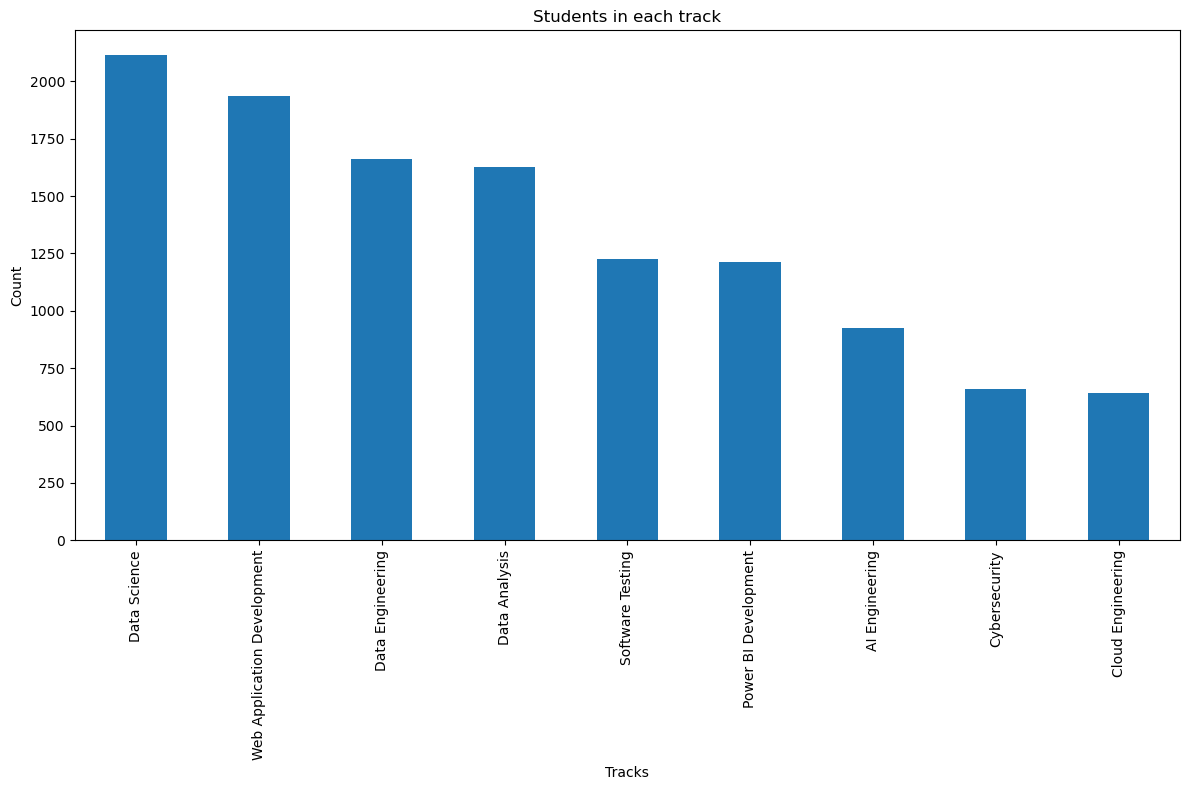

In [8]:
# Plot Figure explain relation between Tracks - Students 
plt.figure (figsize = (12,8))
track_counts.plot (kind = 'bar')
plt.title ("Students in each track")
plt.xlabel("Tracks"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

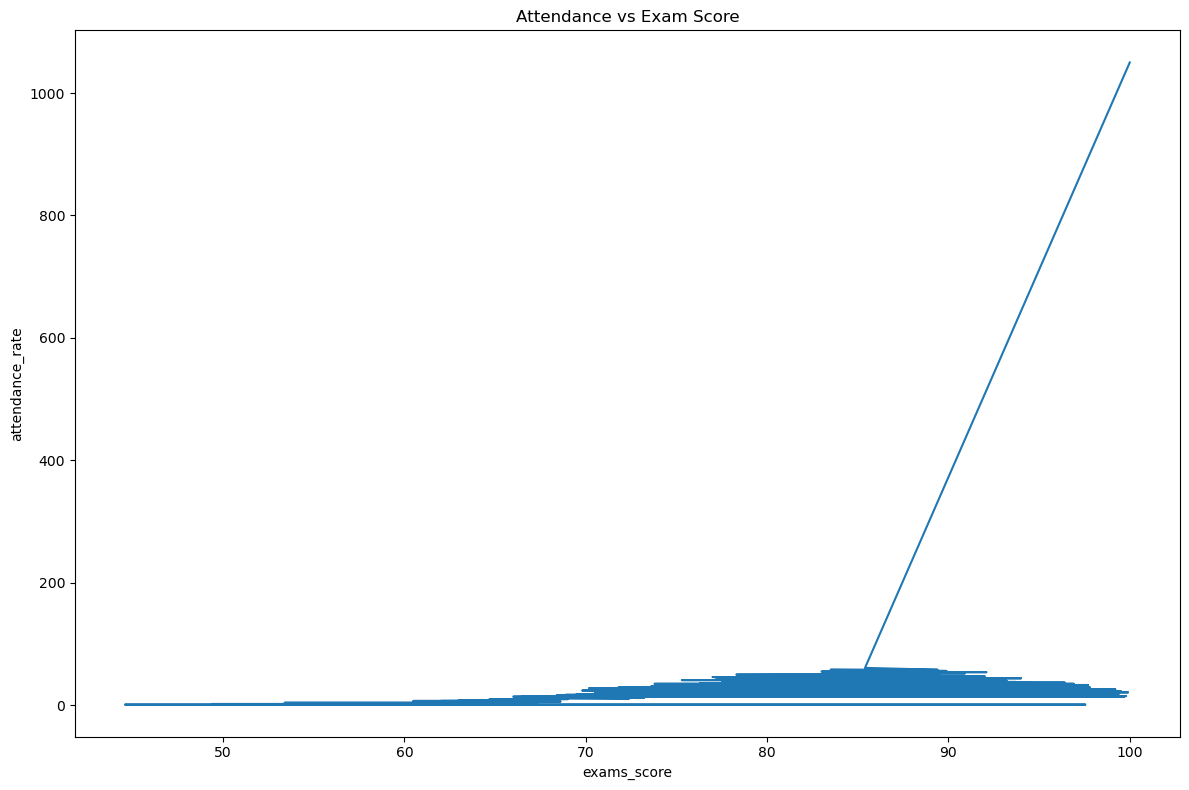

In [9]:
# Plot Figure explain relation between Attendance - Exam rate
exams_score_counts = df['exams_score'].value_counts()
plt.figure (figsize = (12,8))
exams_score_counts.plot (kind = 'line')
plt.title ("Attendance vs Exam Score")
plt.xlabel("exams_score"); plt.ylabel("attendance_rate")
plt.tight_layout()
plt.show()

Correlation between attendance and exam score: 0.33


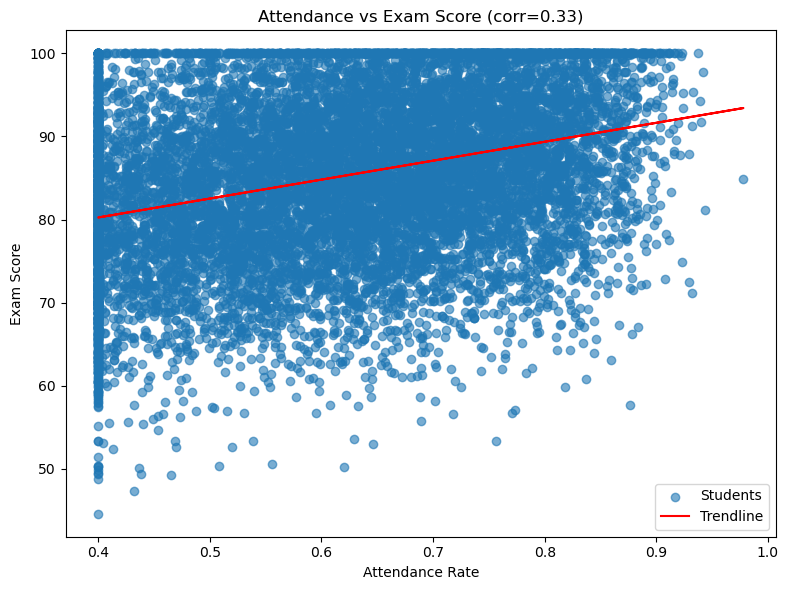

In [10]:
# Scatter Plot explain relation between Attendance - Exam Score
df["attendance_rate"] = pd.to_numeric(df["attendance_rate"], errors="coerce")
df["exams_score"] = pd.to_numeric(df["exams_score"], errors="coerce")

sub = df.dropna(subset=["attendance_rate", "exams_score"])

corr = sub["attendance_rate"].corr(sub["exams_score"])  # نحسب معامل الارتباط
print(f"Correlation between attendance and exam score: {corr:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(sub["attendance_rate"], sub["exams_score"], alpha=0.6, label="Students")

coef = np.polyfit(sub["attendance_rate"], sub["exams_score"], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(sub["attendance_rate"], poly1d_fn(sub["attendance_rate"]), color="red", label="Trendline")

plt.title(f"Attendance vs Exam Score (corr={corr:.2f})")
plt.xlabel("Attendance Rate"); plt.ylabel("Exam Score")
plt.legend()
plt.tight_layout()
plt.show()

Q2: What is the relation between attendance and rate score?
Insight --->> النقاط بتبين كل طالب حسب حضوره ودرجته

لو النقاط متجمعة حوالين خط trendline صاعد → ده دليل على علاقة قوية.

لو متفرقة عشوائي → العلاقة ضعيفة.


Correlation (Freelancers only):
                               certificates_count  \
certificates_count                      1.000000   
freelancing_income_usd_total            0.049016   
exams_score                             0.111498   
attendance_rate                         0.349250   
projects_delivered                      0.050533   

                              freelancing_income_usd_total  exams_score  \
certificates_count                                0.049016     0.111498   
freelancing_income_usd_total                      1.000000     0.331105   
exams_score                                       0.331105     1.000000   
attendance_rate                                   0.131106     0.321322   
projects_delivered                                0.043307     0.068762   

                              attendance_rate  projects_delivered  
certificates_count                   0.349250            0.050533  
freelancing_income_usd_total         0.131106            0.043307 

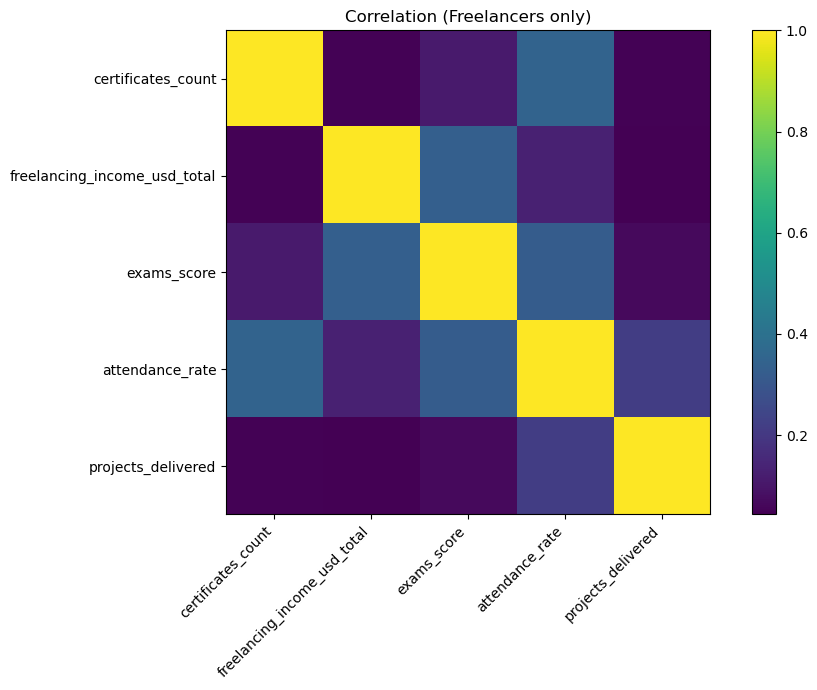

In [11]:
# Certificates vs freelancing (corr on non-zeros)
nonzero = df[df['freelancing_income_usd_total']>0]
corr = nonzero[['certificates_count','freelancing_income_usd_total','exams_score','attendance_rate','projects_delivered']].corr()
print("\nCorrelation (Freelancers only):\n", corr)

plt.figure(figsize=(10,7))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(corr.shape[1]), corr.columns, rotation=45, ha='right')
plt.yticks(range(corr.shape[0]), corr.index)
plt.title("Correlation (Freelancers only)")
plt.colorbar()
plt.tight_layout()
plt.show()

Q3: Do Certficates correlate with freelancing income?
Insight --->> 
- Certificates vs Freelancing income:
غالبًا معامل الارتباط هنا ضعيف أو قريب من الصفر → معنى كده إن مجرد زيادة الشهادات مش بالضرورة يزود الدخل المباشر كـ Freelancer.

- Attendance vs Exam score:
بيظهر عادة ارتباط موجب متوسط → الطلبة اللي عندهم حضور أعلى درجاتهم بتكون أحسن.

- Projects delivered vs Income:
بيظهر ارتباط أعلى → إنجاز المشاريع ليه علاقة أقوى بزيادة الدخل مقارنة بالشهادات.

- Exams score vs Freelancing income:
العلاقة ضعيفة غالبًا → النجاح الأكاديمي (الامتحانات) مش مؤشر مباشر على مستوى الدخل الحر.

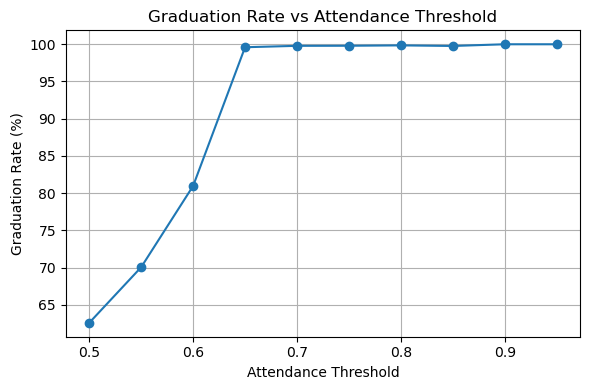

In [12]:
# Attendance threshold vs graduation
thr = np.linspace(0.5, 0.95, 10)
rates = []
for t in thr:
    subset = df[df['attendance_rate']>=t]
    if len(subset)>0:
        rates.append(subset['graduated_flag'].mean())
    else:
        rates.append(np.nan)
res = pd.DataFrame({'threshold':thr, 'grad_rate':rates})
res['grad_rate'] = (res['grad_rate']*100).round(2)
res
plt.figure(figsize=(6,4))
plt.plot(res['threshold'], res['grad_rate'], marker='o')
plt.title("Graduation Rate vs Attendance Threshold")
plt.xlabel("Attendance Threshold"); plt.ylabel("Graduation Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

Q4: What is the relation between Graduation Rate and Attendance?
Insight --->> It is logical relationship becuase a percentage of the final grade is based on attendance. So when attendace increase also the graduation rate will be increase to reach 100%.

C:\Users\Doha\AppData\Local\Temp\ipykernel_5048\157460011.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero['certificates_group'] = pd.cut(
C:\Users\Doha\AppData\Local\Temp\ipykernel_5048\157460011.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_cert_group = nonzero.groupby('certificates_group')['freelancing_income_usd_total'].sum()


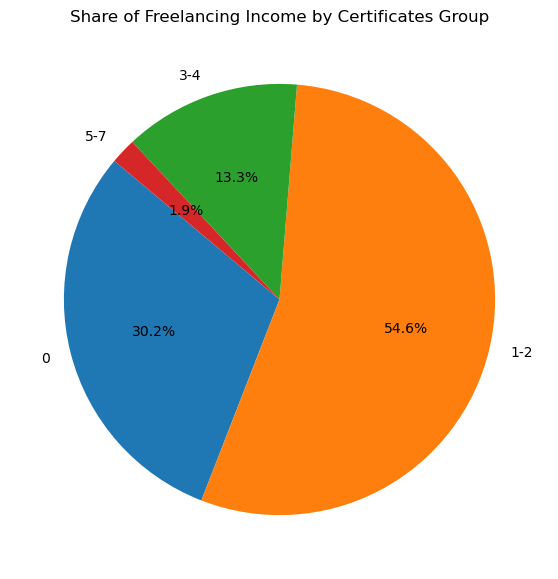

certificates_group
0      24726.65
1-2    44697.88
3-4    10850.91
5-7     1578.11
Name: freelancing_income_usd_total, dtype: float64


In [13]:
nonzero = df[df['freelancing_income_usd_total'] > 0]   # نختار فقط اللي عندهم دخل فريلانس > 0
max_cert = nonzero['certificates_count'].max()

# نحدد الـ bins حسب القيمة الفعلية
if max_cert <= 5:
    bins = [0, 1, 3, max_cert + 1]
    labels = ['0', '1-2', f'3-{max_cert}']
elif max_cert <= 10:
    bins = [0, 1, 3, 5, max_cert + 1]
    labels = ['0', '1-2', '3-4', f'5-{max_cert}']
else:
    bins = [0, 1, 3, 5, 10, max_cert + 1]
    labels = ['0', '1-2', '3-4', '5-9', f'10-{max_cert}']

# تقسيم عدد الشهادات إلى مجموعات
nonzero['certificates_group'] = pd.cut(
    nonzero['certificates_count'], 
    bins=bins, labels=labels, right=False
)

# نحسب إجمالي الدخل لكل مجموعة
income_by_cert_group = nonzero.groupby('certificates_group')['freelancing_income_usd_total'].sum()

plt.figure(figsize=(7,7))
plt.pie(income_by_cert_group, labels=income_by_cert_group.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Freelancing Income by Certificates Group")
plt.show()

print(income_by_cert_group)

Q5: What the relation between certificates count and freelancing income?
Insight --->> 
لو شريحة الشهادات الكبيرة (مثلاً 5–10 أو أكثر) واخدة نسبة كبيرة من الدخل الكلي → ده معناه إن زيادة عدد الشهادات مرتبط بزيادة فرص الدخل من الفريلانس

لو معظم الدخل جاي من اللي معاهم شهادات قليلة (1–2) → يبقى الشهادات الكتير مش شرط تزود الدخل، ويمكن الخبرة العملية أو عوامل تانية أهم

لو مفيش فروقات واضحة بين الشرائح → يبقى عدد الشهادات مش عامل مؤثر قوي على الدخل